# Data Analysis of Covid-19 Dataset

In [34]:
import pandas as pd
data = pd.read_csv('covid.csv')
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
397,4/29/2020,Qinghai,Mainland China,18,0,18
398,4/29/2020,Quebec,Canada,26610,1762,0
399,4/29/2020,Queensland,Australia,1033,6,943
400,4/29/2020,Recovered,Canada,4,0,20327


In [4]:
data.describe()

,Confirmed,Deaths,Recovered
count,402.000000,402.000000,402.000000
mean,10330.763682,714.855721,2961.445274
std,33046.646911,3148.235467,14516.429836
min,0.000000,0.000000,0.000000
25%,111.000000,1.250000,0.000000
50%,712.500000,12.000000,53.000000
75%,4652.250000,161.500000,522.000000
max,299691.000000,27682.000000,132929.000000


In [6]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(328, 6)

* Data Transformation
* Creating new columns: For example, calculating the fatality rate and recovery rate.

In [15]:
data['fatality_rate']=data['Deaths']/data['Confirmed']
data['recovery_rate']=data['Recovered']/data['Confirmed']
data[['Confirmed','Deaths','fatality_rate','recovery_rate']]




,Confirmed,Deaths,fatality_rate,recovery_rate
0,1939,60,0.030944,0.129964
1,766,30,0.039164,0.593995
2,3848,444,0.115385,0.442308
3,743,42,0.056528,0.569314
4,27,2,0.074074,0.259259
...,...,...,...,...
350,222,1,0.004505,0.675676
376,20,0,0.000000,0.850000
388,25,0,0.000000,0.000000
400,4,0,0.000000,5081.750000


In [19]:
data[data['State']=='Beijing']

,Date,State,Region,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
190,4/29/2020,Beijing,Mainland China,593,9,542,0.015177,0.913997


* Filtering and Sorting Data
* Filtering rows: Get data for specific states, regions, or time periods

In [21]:
data.sort_values(by='Confirmed', ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
265,4/29/2020,New York,US,299691,23477,0,0.078337,0.000000
153,4/29/2020,NaN,Spain,236899,24275,132929,0.102470,0.561121
80,4/29/2020,NaN,Italy,203591,27682,71252,0.135969,0.349976
168,4/29/2020,NaN,UK,165221,26097,0,0.157952,0.000000
57,4/29/2020,NaN,France,165093,24087,48228,0.145900,0.292126
...,...,...,...,...,...,...,...,...
305,4/29/2020,Tibet,Mainland China,1,0,1,0.000000,1.000000
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0,0.000000,0.000000
285,4/29/2020,Recovered,US,0,0,120720,NaN,inf
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0,inf,NaN


* Group By Operations
* Aggregations: Group by a column and calculate aggregate statistics

In [22]:
data.groupby('State')['Confirmed'].sum()

State
Alabama     6912
Alaska       355
Alberta     5165
Anguilla       3
Anhui        991
            ... 
Wyoming      545
Xinjiang      76
Yukon         11
Yunnan       185
Zhejiang    1268
Name: Confirmed, Length: 137, dtype: int64

In [23]:
data.groupby('Region').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


* Time Series Analysis
* Resampling and rolling windows: Analyze trends over time

In [66]:
data=pd.read_csv('covid.csv')

In [67]:

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').sum()
rolling_avg = data['Confirmed'].rolling(window=7).mean()
print("Weekly Data:")
print(weekly_data)
print("7-Day Rolling Average of Confirmed Cases:")
print(rolling_avg)



Weekly Data:
                                                        State  \
Date                                                            
2020-05-03  AlabamaAlaskaAlbertaAnguillaAnhuiArizonaArkans...   

                                                       Region  Confirmed  \
Date                                                                       
2020-05-03  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...    4152967   

            Deaths  Recovered  
Date                           
2020-05-03  287372    1190501  
7-Day Rolling Average of Confirmed Cases:
Date
2020-04-29             NaN
2020-04-29             NaN
2020-04-29             NaN
2020-04-29             NaN
2020-04-29             NaN
                  ...     
2020-04-29    10100.285714
2020-04-29    13405.571429
2020-04-29    11127.714286
2020-04-29    10778.857143
2020-04-29     4161.571429
Name: Confirmed, Length: 402, dtype: float64


* Visualization
* Using pandas built-in plotting: Simple visualizations

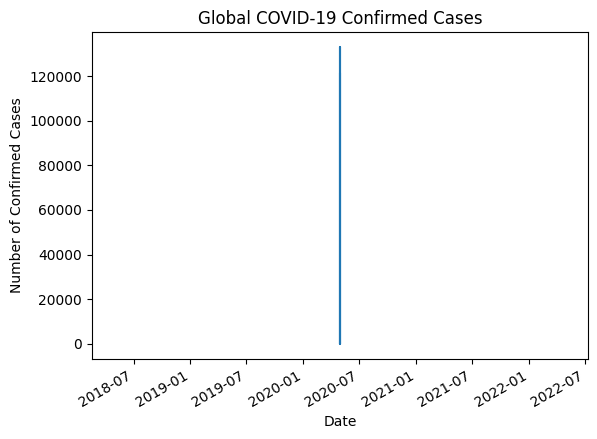

In [70]:
import matplotlib.pyplot as plt
data['Recovered'].plot()
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title('Global COVID-19 Confirmed Cases')
plt.show()

* Pivot Tables

In [71]:
import numpy as np
pd.pivot_table(data, values='Confirmed', index='State', columns='Region', aggfunc=np.sum)

C:\Users\RS COMPUTER\AppData\Local\Temp\ipykernel_1052\420883366.py:2: FutureWarning: The provided callable <function sum at 0x000001C770070D60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(data, values='Confirmed', index='State', columns='Region', aggfunc=np.sum)


Region,Australia,Canada,Denmark,France,Hong Kong,Macau,Mainland China,Netherlands,UK,US
State,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6912.0
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0
Alberta,NaN,5165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
Anhui,NaN,NaN,NaN,NaN,NaN,NaN,991.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.0
Xinjiang,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN
Yukon,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
